# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here
# Import libraries
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (16,6)

In [2]:
df= pd.read_csv("Fraud_Detection.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


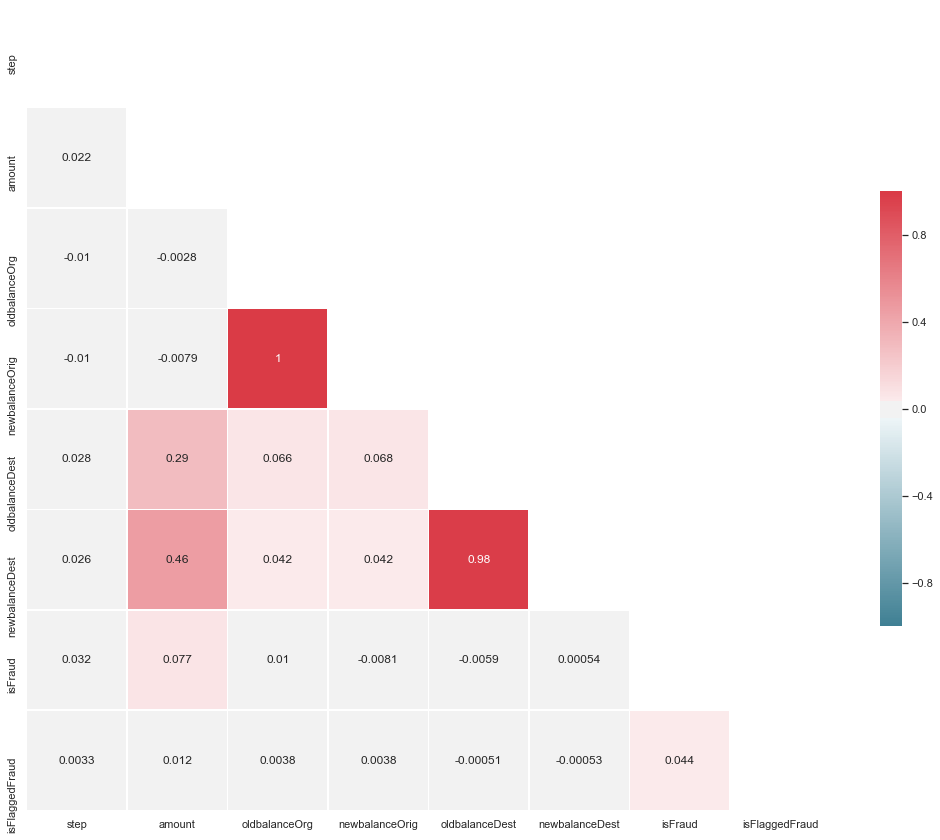

In [4]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})

plt.show()

In [5]:
# High correlation: 'newbalanceOrig','oldbalanceOrig'/'newbalanceDest','oldbalanceDest'

### What is the distribution of the outcome? 

In [6]:
# Your response here
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

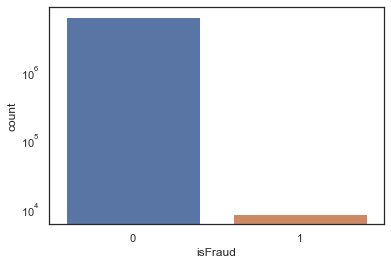

In [7]:
cp = sns.countplot(df["isFraud"])
cp.set_yscale("log")

In [8]:
fraud = df.groupby(['type','isFraud']).sum()
fraud

step        amount  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                           
CASH_IN  0        342111075  2.363674e+11   5.024078e+12    5.260438e+12   
CASH_OUT 0        537501858  3.884238e+11   9.699414e+10    3.909821e+10   
         1          1513537  5.989202e+09   5.984125e+09    2.987676e+05   
DEBIT    0         10293386  2.271992e+08   2.844196e+09    2.699778e+09   
PAYMENT  0        525778430  2.809337e+10   1.467682e+11    1.330439e+11   
TRANSFER 0        129933651  4.792248e+11   2.144796e+10    3.902829e+09   
         1          1512246  6.067213e+09   7.564595e+09    1.579822e+09   

                  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                  
CASH_IN  0          2.221949e+12    2.052897e+12               0  
CASH_OUT 0          3.346768e+12    3.773848e+12               0  
         1          4.465524e+09    1.049393e+10               0  
DEBIT    0          6.186360e+10    6.268676e+10               0  
PAYMENT  0          0.000000e+00    0.000000e+00               0  
TRANSFER 0          1.368296e+12    1.894244e+12               0  
         1          4.397652e+06    1.631184e+07              16

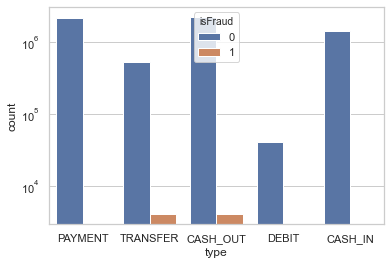

In [9]:
sns.set(style="whitegrid")

g = sns.countplot(df.type, hue=df.isFraud)
g.set_yscale("log")

In [10]:
# Payment/Debit/Cash_In --> NO fraudolent operations

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [11]:
# Check null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# Your code here

# Time variable
df.step.unique()
print(len(df.step.unique()))
print('Too many unique values --> in NOT possible to create categories --> drop column')

743
Too many unique values --> in NOT possible to create categories --> drop column


In [13]:
# Names
df.nameOrig.unique()
df.nameDest.unique()
print(len(df.nameOrig.unique()),len(df.nameDest.unique()))
print('Too many unique values --> in NOT possible to create categories --> drop column')

6353307 2722362
Too many unique values --> in NOT possible to create categories --> drop column


In [14]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [15]:
# Drop types with no fraudolent operations

df.drop(df[(df['type'] == 'PAYMENT') | (df['type'] == 'DEBIT') | (df['type'] == 'CASH_IN')].index, inplace = True)
df.reset_index(drop=True,inplace = True)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
2770405,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
2770406,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
2770407,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [16]:
# Create bynary column (Type)

df = pd.get_dummies(df, columns = ['type'])
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
0,1,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,0,1
1,1,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,1,0
2,1,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,1,0
3,1,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,0,1
4,1,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,1,0
2770405,743,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,0,1
2770406,743,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,1,0
2770407,743,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,0,1


In [17]:
# Drop unuseful columns

df.drop(['step', 'nameOrig', 'nameDest','newbalanceOrig','newbalanceDest','type_TRANSFER'], inplace=True, axis=1)
df.rename(columns = {'type_CASH_OUT':'type'}, inplace = True)
df

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type
0,181.00,181.00,0.00,1,0,0
1,181.00,181.00,21182.00,1,0,1
2,229133.94,15325.00,5083.00,0,0,1
3,215310.30,705.00,22425.00,0,0,0
4,311685.89,10835.00,6267.00,0,0,0
...,...,...,...,...,...,...
2770404,339682.13,339682.13,0.00,1,0,1
2770405,6311409.28,6311409.28,0.00,1,0,0
2770406,6311409.28,6311409.28,68488.84,1,0,1
2770407,850002.52,850002.52,0.00,1,0,0


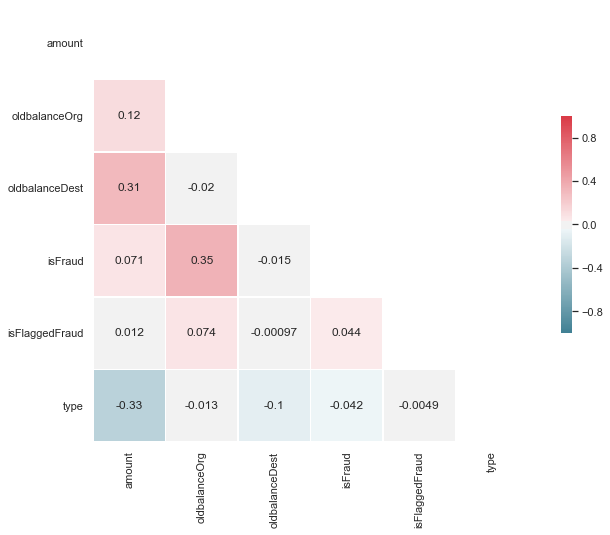

In [22]:
# Check correlation
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})

plt.show()

In [24]:
 # Check unbalanced target
df.isFraud.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

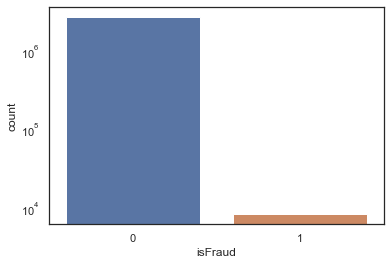

In [23]:
cp = sns.countplot(df["isFraud"])
cp.set_yscale("log")

### Run a logisitc regression classifier and evaluate its accuracy.

In [25]:
# Data
X = df.drop('isFraud', axis=1)
y = df.isFraud

In [28]:
# X

In [29]:
# y

In [31]:
# Unbalance target -- Viz with PCA to understand what's the better undersampling method

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
pc = pca.transform(X)
pc

array([[-1720942.66116189,  -204372.59059289],
       [-1699808.34302085,  -205790.49773235],
       [-1700536.41407892,    24168.14944576],
       ...,
       [-1236434.41128543,  6356696.5521841 ],
       [-1664903.92347092,   679707.90667897],
       [ 4830540.59170916,   243926.77148454]])

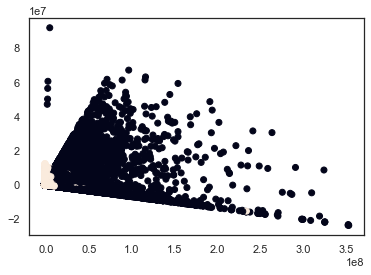

In [32]:
# Viz
plt.scatter(pc[:,0],pc[:,1], c =y);

In [39]:
# Undersampling -MIss
from imblearn.under_sampling import NearMiss

nr = NearMiss()
X_under, y_under = nr.fit_resample(X, y)

In [40]:
pca = PCA(n_components=2)
pca.fit(X_under)
pc_under = pca.transform(X_under)
pc_under

array([[-1109069.65271457,  -219015.16768047],
       [-1012752.72013613,  -223633.36580835],
       [-1135706.12038323,  -217738.16668245],
       ...,
       [ 7607142.80601585,  -568366.06207148],
       [   40024.84905248,  -274110.40399072],
       [  367220.75516902,  6227305.67337295]])

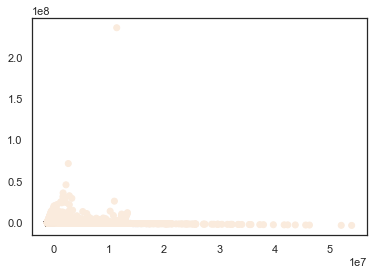

In [41]:
# Viz - undersampling
plt.scatter(pc_under[:,0],pc_under[:,1], c =y_under);

In [46]:
# Your code here
# import libraries
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 0) 

In [47]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(X_train)

print(accuracy_score(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

0.4986301369863014
[[   0 6583]
 [   5 6552]]


In [50]:
y_pred_test = model.predict(X_test)

print(accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

0.5036518563603165
[[   0 1630]
 [   1 1655]]


In [ ]:
# What's wrong with resampling?

### Now pick a model of your choice and evaluate its accuracy.

In [19]:
# Your code here

### Which model worked better and how do you know?

In [20]:
# Your response here